# O que é machine learning?

Machine learning, ou aprendizado de máquinas, é o desenvolvimento de algoritmos genéricos que conseguem identificar e aprender coisas sobre um determinado monte de dados sem ser explicitamente programado para tal.

Ao invés de escrever decisões lógicas, você alimenta seu algorítmo com dados e ele decide como interpretar aquilo e tomar decisões em cima dos dados.

Por exemplo, você pode alimentar um algoritmo com dados sobre números escritos à mão e pedir que ele identifique novos números. Você pode, também, alimentar esse mesmo algoritmo com dados sobre emails que são spam e não spam e pedir que ele identifique novos emails.

![algorimtos são caixas pretas](../static/images/ml_blackbox.png)

# Tipos de machine learning
Machine learning é um campo vasto. As 3 sub-áreas mais comuns são, porém, **aprendizado supervisionado**, **não supervisionado** e **de reforço**.

Nessa primeira aula vamos focar no primeiro tipo. Na próxima, falaremos de técnicas de otimização e do segundo. O terceiro tipo está fora do escopo dessas aulas.

Esses 3 tipo são definidos mais ou menos assim:

## Aprendizado supervisionado
Para ilustrar o conceito, vamos pensar em um exemplo.

Digamos que estamos nos anos 90 e você trabalha em uma locadora de filmes. Sua locadora é diferenciada porque vocês costumam recomendar filmes para os seus clientes. Contudo, você percebe que tem um grande problema quando vocês contratam alguém novo. Esse novo empregado não conhece todos os filmes da sua locadora e, por isso, não consegue recomendar muitos filmes para os clientes. Você descobre que vocês têm uma tabela com várias informações como gênero, ano, duração e vários outras características dos filmes. Você também sabe que têm uma tabela com os últimos filmes que todos os seus clientes alugaram.

Você decide então escrever um programa que tenta recomendar filmes para os seus clientes com base no que eles costumam assistir.

![filmes](../static/images/movies.png)


Vocês então recebem um filme novo, Rei leão, e devem decidir quem seria o cliente que mais gostaria daquele filme:


![cliente](../static/images/client.png)

Isso é aprendizado supervisionado. Você entendeu o padrão e foi capaz de encontrar qual a pessoa que poderia gostar mais desse filme. Nesse caso, talvez o ano ou nome não façam muita diferença, mas em casos mais complexos, como a previsão de preços de casas ou de músicas, seja necessário mais cálculos.

O seu algoritmo tem que ser capaz de ir além desses dados e generalizar as características para decidir.

Em aprendizado supervisionado você deixa o computador descobrir essa lógica para você e, com ela, ele é capaz de fazer previsões e trabalhar com dados novos.

## Aprendizado não supervisionado

Em aprendizado supervisionado nós não temos o que cada filme **é**. Temos apenas dados e temos que extrair informações deles. Em nosso exemplo anterior, nós podemos aplicar algoritmos de aprendizado não supervisionado para identificar mercados nos filmes. Podemos usar as idades dos clientes para descobrir que gêneros de filmes são mais populares com que faixas etárias, descobrir se homens gostam mais de filmes de ação que mulheres e até fazer análises ao longo do tempo pra saber exatamente onde e como devemos promover um filme para obter o máximo possível de clientes interessados.

## Aprendizado de reforço

Aprendizado de reforço é muito menos sobre previsões e muito mais sobre resultados. Usamos aprendizado de reforço quando queremos criar algoritmos novos que atingem o melhor resultado possível.

Digamos que queremos manter um cliente sendo fiel durante muito tempo. Para isso nós mandamos emails de recomendação e enviamos presentes de vez em quando para manter ele interessado em nós. Porém, não queremos que ele sinta que estamos forçando a barra. Como encontrar esse equilibrio?

Primeiro criamos um algoritmo que decide quando enviar um email ou um presente. A partir daí, começamos a mandar emails e presentes e avaliar a resposta dos clientes. Sempre que um cliente sai da nossa lista de email nós dizemos pro algoritmo que ele fez besteira. Sempre que ele recomenda o nosso sistema para alguém, dizemos que ele fez bem. Ao longo do tempo ele começa a aprender quais padrões de presentes e emails rendem mais "elogios" e menos "críticas". Nós usamos essas reflexões para **reforçar comportamentos** que são bons ou ruins e incentivamos os algoritmos a se melhorarem e se adaptarem. Isso é diferente de um algoritmo supervisionado pois o feedback pode demorar meses para vir e o algoritmo tem que ser capaz de refletir sobre suas ações e experimentar coisas novas para **otimizar** seus resultados.


Agora que já vimos um pouco sobre eles, vamos mais a fundo em algortimos supervisionados.

# Introdução ao aprendizado supervisionado

Ok, já vimos a teoria, agora vamos escrever um programa que encontre filmes para a gente!

Se você não soubesse nada sobre aprendizado de máquinas, talvez escrevesse um programa mais ou menos assim:

```Python
def recomendar_filme(filme, ano, gênero, lista_de_filmes):
    
    # Encontra os filmes que tem o mesmo genero do filme novo
    filmes_com_mesmo_genero = filter(lambda x: x['gênero'] == gênero, lista_de_filmes)
    
    # Dentro desses, acha os que tem o um ano próximo
    filmes_ano_proximo = filter(lambda x: ano + 5 >= x['ano'] >= ano - 5, filmes_com_mesmo_genero)
    
    # Desses encontrados, pegar o cliente que alugou um desses filmes e recomendar pra ele
    cliente = filmes_ano_proximo[0]['cliente']
    return cliente
```

Se você ficar mexendo bastante nisso por horas talvez consiga alguma coisa que funcione, mas seu programa nunca será perfeito e sempre terá que alterar alguma coisa pra filmes novos.

O ideal seria simplesmente pedir que o computador fizesse tudo pra você

```Python
def recomendar_filme(filme, ano, gênero, lista_de_filmes):
    cliente = <computador, por favor, faz esses cálculos por mim>
    
    return cliente
```

O que ele vai fazer na verdade é transformar esses valores que nós criamos, gêneros, anos e tal em **vetores em um hiperespaço** que pode ser representado por números.

No fim o que o computador vai gerar é algo como:

```Python
def recomendar_filme(filme, ano, gênero, lista_de_filmes):
    vetor_gênero = *vetorizador_gênero(gênero) * [63.61124, .053823, 23.23521, 294.43213, .000123, 1.]
    
    vetor_ano = *vetorizador_ano(ano) * [54.2421543, .00342, 5143532.3415]
    
    vetor_cliente = 873.5323 + vetor_gênero + vetor_ano
    
    cliente = distribuição_prob(lista_de_filmes, vetor_cliente)
    
    return cliente
```

Todos esses valores nas listas são o que chamamos de **pesos**. Eles são gerados **aleatoriamente** pelo computador e testados milhares de vezes até que o valor que obtem o **menor erro** seja encontrado. Como podem ver, são vetores multi dimensionais que podem ter, na verdade, centenas de dimensões. Cada dimensão representa um ano ou gênero de filme e os pesos representam a interação entre eles.

No fim nós podemos usar uma distribuição probabilística para encontrar o cliente que teria a maior probabilidade de gostar do filme que estamos analisando.

É imporante ressaltar que os valores iniciais desses pesos são aleatórios. Para encontrar os valores finais, existem diversas técnicas de otimização que, eventualmente, tendem a reduzir o erro total do sistema a um mínimo.

Para calcular esse erro, podemos usar uma função de **custo** que define a **distância** entre o valor previsto e o valor definido como correto (aí está, novamente, por que estamos usando aprendizado supervisionado).

A **função de custo** pode tomar diversas formas, mas a mais comum e talvez a mais simples é a **soma do erro quadrado**, onde por erro nós definimos a distância probabilística até o valor correto.

\begin{align}
Custo = \frac{\sum_{i=1}^n \left( meu\_chute(i) - valor\_real(i) \right)^2}{2n}
\end{align}

Vamos agora reescrever essa função usando alguns jargões de machine learning que você não tem que se preocupar agora

\begin{align}
J(\theta) = \frac{1}{2m}\sum_{i=0}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
\end{align}

Onde $\theta$ representa os **pesos** e $J(\theta)$ o **custo para os pesos atuais**

Se nós fizermos um gráfico dos pesos, teremos algo assim:

![pesos](../static/images/pesos.png)

Onde o eixo vertical representa o valor do custo dados os pesos nos eixos horizontais.

Nesse gráfico, o que queremos fazer é reduzir ao mínimo o nosso custo (erro). Para isso usamos técnicas de otimização, onde fazemos algo assim:

![pesos](../static/images/pesos2.png)


Para isso nós precisamos ajustar nossos pesos de forma que estejamos 'descendo a ladeira' em direção ao mínimo.

Ter o erro mínimo significa estar o mais próximo possível, teoreticamente, da previsão perfeita.

Se você lembra algo de cálculo, deve saber que se nós pegarmos a derivada de uma função em cada variável e somarmos, obtemos uma outra função cujo valor define a direção de crescimento máximo. ([gradiente](https://en.wikipedia.org/wiki/Gradient))

\begin{align}
\nabla f(x, y) = \frac{\partial f}{\partial x} i + \frac{\partial f}{\partial y} j
\end{align}

Esse é um método de otimização simples, mas eficiente, que nos permite rapidamente encontrar os valores de peso mínimo de nossa fução de custo e, logo, o **estado mais otimizado do nosso modelo**.

Isso é apenas uma introdução, então não vamos ir mais fundo que isso, mas sinta-se livre para [aprender mais caso queira](http://hbfs.wordpress.com/2012/04/24/introduction-to-gradient-descent/).

Não se preocupe, porém, em ter tudo isso na cabeça. Quando você usar uma biblioteca de machine learning tudo isso será **feito pela biblioteca, não por você**. Porém é importante ter uma noção do que está acontecendo.

## O que acabamos de aprender?

Isso tudo que nós vimos é o funcionamento de uma **regressão linear multivariacional**. Vamos ver isso novamente mais pra frente do curso, incluindo alguns conceitos como **overfitting**, **tendência, ou bias**, **validação** e outras coisas.

Saiba, porém, que nem sempre será possível usar esses algoritmos para prever essas coisas. Isso acontece porque muitas vezes as relações entre essa variáveis (ano/gênero) não são lineares. Para esses outros casos nós teremos que usar outros **modelos** e até outras técnicas. Veremos tudo isso mais pra frente.

## Aprendizado de máquinas é mágica?
Assim que nós começarmos a aplicar machine learning para solucionar alguns problemas, começaremos a perceber que é muito fácil solucionar problemas que parecem ser muito difíceis de se resolver de outra forma.

É importante notar, porém, que aprendizado de máquinas só funciona para resolver problemas que **podem ser resolvidos**.

Por exemplo, não é possível determinar o tipo de filme que alguém gosta baseado na raça de cachorro que essa pessoa tem. Não importa o quanto você altere seu algoritmo e o quão bons os seus resultados fiquem para o dataset de treino, será impossível ter uma boa validação fora disso. Seu modelo sofrerá de overfitting e você precisará de outras características para resolver esse problema.

![magica](../static/images/magicas.png)


Com isso nós concluímos nossa introdução ao ML. Agora vamos começar a programar algumas coisas e fazer ML de verdade!

# Programando Machine Learning

Para programar e usar machine learning, vamos usar uma biblioteca de ML muito famosa chamada SKLearn. Ela contém centenas de modelos e algoritmos de classificação, regressão, clusterização e muito mais.

Você pode ler sobre o projeto no site deles:
[http://scikit-learn.org/stable/](http://scikit-learn.org/stable/)

![scikit](../static/images/scikit.png)


## Algoritmos e superficies de decisão

Geralmente nós conseguimos plotar nossos dados em gráficos, onde cada eixo representa uma característica dos dados e cada ponto um dado específico. Geralmente as cores representam o tipo, ou **label** de cada dado.

Primeiro vamos definir uma função que gera gráficos para nós. Isso vai ser bem útil no futuro.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def generate_data(blue, red, test_size=0.2, func=lambda x: x):
    
    blue_x = np.vectorize(func)(np.random.randint(*blue[0]))
    blue_y = np.vectorize(func)(np.random.randint(*blue[1]))
    red_x = np.vectorize(func)(np.random.randint(*red[0]))
    red_y = np.vectorize(func)(np.random.randint(*red[1]))
    
    blue_vals = np.dstack((blue_x, blue_y, ["blue" for _ in blue_x]))[0]
    red_vals = np.dstack((red_x, red_y, ["red" for _ in red_x]))[0]
    
    X = np.append(blue_vals, red_vals, axis=0)
    
    Y = [1 for _ in range(len(blue_vals))]
    Y.extend([0 for _ in range(len(red_vals))])
    
    return train_test_split(X, Y, test_size=test_size)

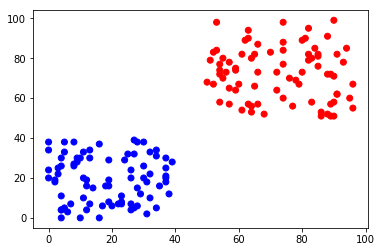

In [3]:
X_train, X_test, y_train, y_test = generate_data([[0, 40, 100], [0, 40, 100]], [[50, 100, 100], [50, 100, 100]])

plt.scatter(X_train[:, 0], X_train[:, 1], c=X_train[:, 2])
plt.show()

Como pode ver, nós temos dados separados no que são claramente objetos diferentes. É muito fácil criar uma barreira que separa os dois clusters.

Depois de separar, fica bem fácil assumir que tudo que estiver de um lado dela será azul e do outro vermelho. Essa barreira se chama uma **superfície de decisão** e é um dos conceitos principais quando lidamos com algoritmos de classificação.

Agora vamos ver um algoritmo de classificação e experimentar com ele.

# Naive Bayes
Para o nosso primeiro modelo de aprendizado supervisionado, aprenderemos um modelo de classificação probabilístico chamado Naive Bayes, que vem de um homem religioso chamado Bayes que criou o teorema de Bayes para provar a existência de Deus.

O algoritmo, como o nome sugere, usa o [Teorema de Bayes](https://en.wikipedia.org/wiki/Bayes%27_theorem) para descobrir a probabilidade de um novo elemento se encaixar numa categoria específica.


Usando o SKLearn, nosso código sempre terá um padrão como veremos abaixo.

In [4]:
# Em X_train nós temos os nossos dados brutos, suas coordenadas. 
# Em y_train nós temos a categoria (1 para azul e 0 para vermelho)
# Não se preocupe com os _test por enquanto
X_train, X_test, y_train, y_test = generate_data([[0, 40, 100], [0, 40, 100]], [[50, 100, 100], [50, 100, 100]])

# Desses dados, nós podemos importar o classificador de Nayve Bayes
from sklearn.naive_bayes import GaussianNB

# Criar um objeto classficador
clf = GaussianNB()

# E fitar, ou seja, treinar nosso clssificador usando os dados de X_train e y_train
clf.fit(X_train[:, :2].astype(np.int), y_train)

GaussianNB(priors=None)

In [5]:
# Agora nós criamos uma outra função que vai criar um gráfico e desenhar a nossa superfície de decisão
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X):
    h = .02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].astype(np.float).min() - 1, X[:, 0].astype(np.float).max() + 1
    y_min, y_max = X[:, 1].astype(np.float).min() - 1, X[:, 1].astype(np.float).max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    print("predicting")
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print("predicted")
    print("length", len(Z))

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    print("colormesh")

    # Plot also the training points
    plt.scatter(X[:, 0].astype(np.float), X[:, 1].astype(np.float), c=X[:, 2])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    print("showing")     
    plt.show()

predicting
predicted
length 25000000
colormesh
showing


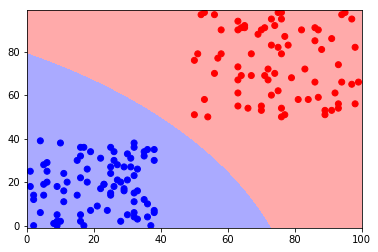

CPU times: user 22.4 s, sys: 3.32 s, total: 25.8 s
Wall time: 25.9 s


In [6]:
# Finalmente, passamos os argumentos para nossa função
%time plot_decision_boundary(clf, X_train)

Pode demorar um tempo, mas no final você deverá ser capaz de ver bem onde exatamente a decisão é feita para separar ambas as cores. Qualquer ponto na zona azul será previsto por nosso algoritmo como azul e o mesmo vale para a zona vermelha.

Nós podemos, por exemplo, testar nosso algoritmo:

In [9]:
# Criamos um novo ponto que queremos testar
novo_ponto = (0, 75)

# Geramos uma previsão para ele. Se sair 1, será azul e 0 será vermelho
print(clf.predict_proba([novo_ponto]))

[[ 0.12264511  0.87735489]]


Excelente! Temos nosso primeiro classificador. Agora algo importante que devemos fazer é testar esse classificador.

## Testando

Para isso, usaremos uma ferramenta muito útil chamada **matriz de confusão**. Essa matriz nos diz exatamente quantos pontos foram corretamente previstos, quantos foram falsos positivos e quantos foram falsos negativos. Para isso, criamos uma função que gera essa matriz para nós:

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
def plot_confusion_matrix(y_true, y_predicted):
    plt.matshow(confusion_matrix(y_true, y_predicted), cmap=plt.cm.binary, interpolation='nearest')
    plt.title('Matriz de previsão')
    plt.colorbar()
    plt.ylabel('Categoria esperada')
    plt.xlabel('Categoria prevista')
    plt.show()

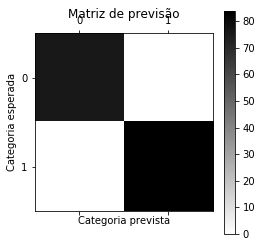

In [11]:
# Vamos ver como fica para os dados que usamos para treinar
plot_confusion_matrix(y_train, clf.predict(X_train[:, :2].astype(np.int)))

Esse formato que estamos vendo é o ideal. Ele representa que todos os valores de azul foram previstos corretamente e os de vermelho também, sem falsos positivos ou negativos.

Nós também podemos gerar algo chamado **relatório de classificação**, que faz exatamente o que o nome sugere:

In [12]:
print(classification_report(y_train, clf.predict(X_train[:, :2].astype(np.int))))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        76
          1       1.00      1.00      1.00        84

avg / total       1.00      1.00      1.00       160



Nesse relatório, temos 4 valores:

- **Precisão**: Relação entre os verdadeiros positivos e o total. Diz o quão preciso foi a classificação dado todos os dados
- **Recall**: Relação entre verdadeiros positivos e positivos. Diz o quão certeiro foi a classificação para encontrar os positivos
- **F1-Score**: Média harmônica entre precisão e recall. Boa forma de avaliar de forma completa a classificação
- **Support**: É o número de ocorrências de cada classe em verdadeiro-positivo

Esses dados são bacanas, mas não são muito interessantes do ponto de vista de previsões futuras. O que nós queremos acima disso é checar se nosso algoritmo é capaz de ser generalizado para dados novos.

Para isso vamos usar aquelas variáveis que criamos antes: `X_test` e `y_test` que não foram fornecidas ao nosso classificador para treinamento:

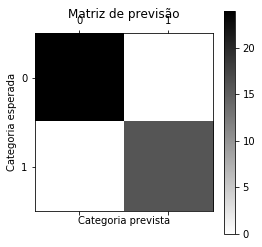

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        24
          1       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00        40



In [13]:
plot_confusion_matrix(y_test, clf.predict(X_test[:, :2].astype(np.int)))
print(classification_report(y_test, clf.predict(X_test[:, :2].astype(np.int))))

Como pode ver, mesmo assim o nosso algoritmo foi fantástico na classificação. Isso é de se esperar, dado que foram dados bem simples.

Vamos testar algo mais complexo agora

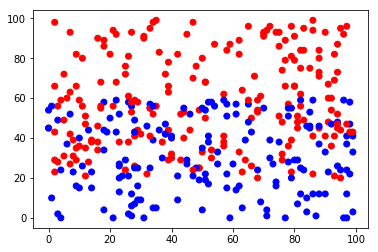

In [14]:
X_train, X_test, y_train, y_test = generate_data([[0, 100, 200], [0, 60, 200]], [[00, 100, 250], [20, 100, 250]])
plt.scatter(X_train[:, 0], X_train[:, 1], c=X_train[:, 2])
plt.show()

Como pode ver, esse já é mais difícil pois temos muita intersecção entre os pontos. Como noss algoritmo vai se sair agora?

             precision    recall  f1-score   support

          0       0.78      0.57      0.66        49
          1       0.61      0.80      0.69        41

avg / total       0.70      0.68      0.68        90



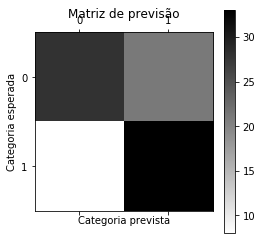

predicting
predicted
length 25502500
colormesh
showing


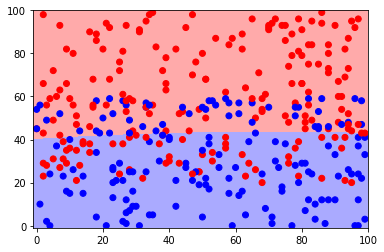

CPU times: user 22.9 s, sys: 3.29 s, total: 26.2 s
Wall time: 26.7 s


In [15]:
clf = GaussianNB()
clf.fit(X_train[:, :2].astype(np.int), y_train)
print(classification_report(y_test, clf.predict(X_test[:, :2].astype(np.int))))
plot_confusion_matrix(y_test, clf.predict(X_test[:, :2].astype(np.int)))
%time plot_decision_boundary(clf, X_train)

70% de precisão não é tão bom assim. Dá pra ver por que foi tão ruim.

Nossas features não estão sendo suficientes para separar corretamente os dados. Para separar, nós precisaremos adiconar features novas que, em outras dimensões, separem os nossos dados. Uma visualização desse resultado seria:


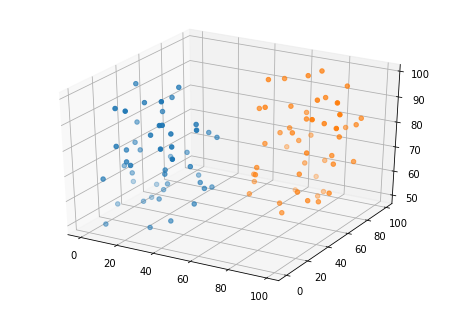

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = list(range(0, 50))
sequence_containing_y_vals = list(range(0, 50))
sequence_containing_z_vals = list(range(50, 100))

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
sequence_containing_x_vals = list(range(50, 100))
sequence_containing_y_vals = list(range(50, 100))
sequence_containing_z_vals = list(range(50, 100))

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)

plt.show()


Agora vamos sair um pouco de Nayve Bayes e testar outro algoritmo de classificação. Esse agora se chama Support Vector Machines e é melhor em algumas situações em comparação com o Nayve Bayes.

# Support Vector Machines

Para treinar um SVM, fazemos da mesma forma que fazíamos com NB:

In [17]:
from sklearn.svm import SVC
from math import sqrt

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        22
          1       1.00      1.00      1.00        18

avg / total       1.00      1.00      1.00        40



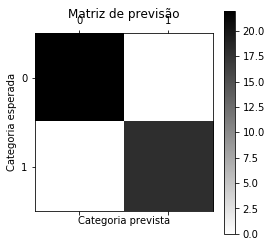

predicting
predicted
length 25502500
colormesh
showing


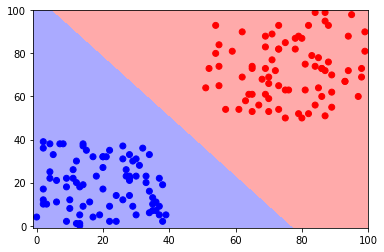

CPU times: user 30.1 s, sys: 1.9 s, total: 31.9 s
Wall time: 32.1 s


In [18]:
X_train, X_test, y_train, y_test = generate_data([[0, 40, 100], [0, 40, 100]], [[50, 100, 100], [50, 100, 100]])

clf = SVC(kernel="linear")
clf.fit(X_train[:, :2].astype(np.int), y_train)
print(classification_report(y_test, clf.predict(X_test[:, :2].astype(np.int))))
plot_confusion_matrix(y_test, clf.predict(X_test[:, :2].astype(np.int)))
%time plot_decision_boundary(clf, X_train)

Como podem ver, é bem parecido com o NB, mas é mais linear.

O que acontece quando nossa barreira de classificação não é separavel linearmente?

In [19]:
def generate_circular_data(min_radius, med_radius, max_radius, d1=100, d2=100, test_size=0.2, func=lambda x: x):
    
    x1 = np.random.uniform(-min_radius, min_radius, d1)
    y1 = []
    for i in x1:
        yy = np.random.uniform(0, sqrt(min_radius**2 - i**2))
        if random.choice([True, False]):
            yy = -yy
        y1.append(yy)

    x2 = np.random.uniform(-max_radius, max_radius, d2)
    y2 = []
    for i in x2:
        low = sqrt(med_radius**2 - i**2) if med_radius**2 - i**2 > 0 else 0
        yy = np.random.uniform(low, sqrt(max_radius**2 - i**2))
        if random.choice([True, False]):
            yy = -yy
        y2.append(yy)
    
    blue_vals = np.dstack((np.vectorize(func)(x1), np.vectorize(func)(y1), ["blue" for _ in x1]))[0]
    red_vals = np.dstack((np.vectorize(func)(x2), np.vectorize(func)(y2), ["red" for _ in x2]))[0]
    
    X = np.append(blue_vals, red_vals, axis=0)
    
    Y = [1 for _ in range(len(blue_vals))]
    Y.extend([0 for _ in range(len(red_vals))])
    
    return train_test_split(X, Y, test_size=test_size)

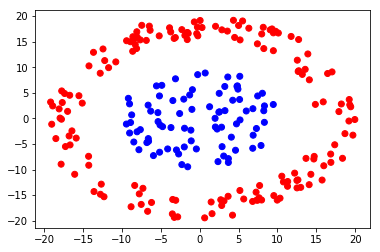

In [20]:
X_train, X_test, y_train, y_test = generate_circular_data(10, 15, 20, 100, 200)

plt.scatter(X_train[:, 0], X_train[:, 1], c=X_train[:, 2])
plt.show()

             precision    recall  f1-score   support

          0       0.70      1.00      0.82        42
          1       0.00      0.00      0.00        18

avg / total       0.49      0.70      0.58        60



/Users/Maronato/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


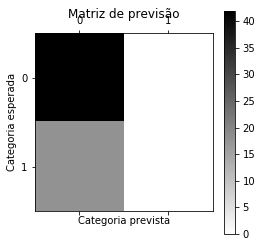

predicting
predicted
length 4179848
colormesh
showing


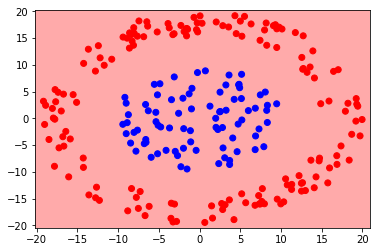

CPU times: user 9.77 s, sys: 238 ms, total: 10 s
Wall time: 10 s


In [21]:
clf = SVC(kernel="linear")
clf.fit(X_train[:, :2].astype(np.float), y_train)
print(classification_report(y_test, clf.predict(X_test[:, :2].astype(np.float))))
plot_confusion_matrix(y_test, clf.predict(X_test[:, :2].astype(np.float)))
%time plot_decision_boundary(clf, X_train)

É facil perceber que essa barreira será difícil pro nosso SVM classifier. O que podemos fazer então?

Podemos criar features novas a partir das anteriores. Nesse caso, podemos criar uma feature que representa o **quadrado das variáveis**.

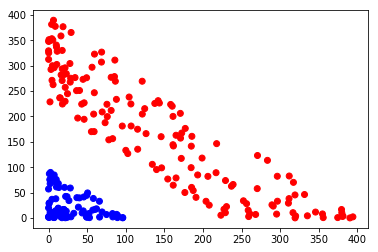

In [22]:
square = lambda x: x**2

X_train, X_test, y_train, y_test = generate_circular_data(10, 15, 20, 100, 200, func=square)

plt.scatter(X_train[:, 0], X_train[:, 1], c=X_train[:, 2])
plt.show()

E, finalmente, podemos testar nosso classificador usando essas features novas

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        42
          1       1.00      1.00      1.00        18

avg / total       1.00      1.00      1.00        60



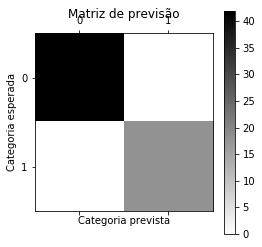

predicting
predicted
length 387919872
colormesh
showing


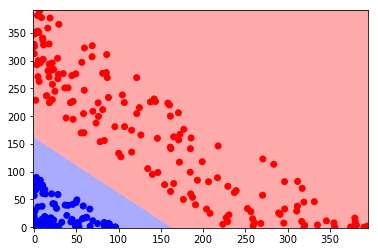

CPU times: user 8min 48s, sys: 3min 12s, total: 12min 1s
Wall time: 14min 11s


In [23]:
clf = SVC(kernel="linear")
clf.fit(X_train[:, :2].astype(np.float), y_train)
print(classification_report(y_test, clf.predict(X_test[:, :2].astype(np.float))))
plot_confusion_matrix(y_test, clf.predict(X_test[:, :2].astype(np.float)))
%time plot_decision_boundary(clf, X_train)

De fato, é isso que o SVC é capaz de fazer sozinho. Ao contrário do NB, o SVC é capaz de usar **truques de kernel** para explorar variáveis novas e configurações novas de variáveis. Experimentemos rodar o código para o gráfico circular, mas com a kernel sendo a padrão:

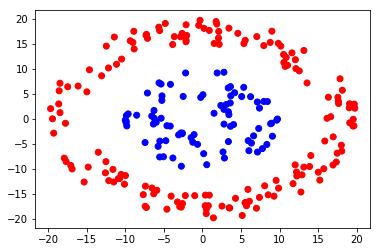

             precision    recall  f1-score   support

          0       0.93      1.00      0.97        42
          1       1.00      0.83      0.91        18

avg / total       0.95      0.95      0.95        60



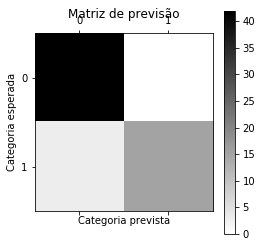

predicting
predicted
length 4299390
colormesh
showing


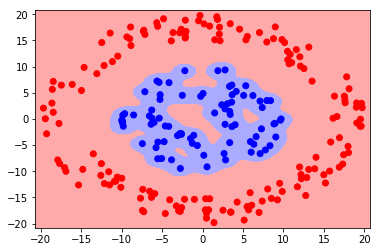

CPU times: user 20.9 s, sys: 368 ms, total: 21.2 s
Wall time: 21.3 s


In [24]:
X_train, X_test, y_train, y_test = generate_circular_data(10, 15, 20, 100, 200)

plt.scatter(X_train[:, 0], X_train[:, 1], c=X_train[:, 2])
plt.show()

clf = SVC()
clf.fit(X_train[:, :2].astype(np.float), y_train)
print(classification_report(y_test, clf.predict(X_test[:, :2].astype(np.float))))
plot_confusion_matrix(y_test, clf.predict(X_test[:, :2].astype(np.float)))
%time plot_decision_boundary(clf, X_train)